In [21]:
import nighres
import os
from nilearn import plotting

In [22]:
input_dir = '/home/remi/gin/V5_high-res/pilot_1/raw/'

In [23]:
from bids import BIDSLayout
layout = BIDSLayout(input_dir)

/home/remi/.local/lib/python3.6/site-packages/bids/layout/models.py:152: FutureWarning: The 'extension' entity currently excludes the leading dot ('.'). As of version 0.14.0, it will include the leading dot. To suppress this warning and include the leading dot, use `bids.config.set_option('extension_initial_dot', True)`.
  FutureWarning)


In [24]:
layout.get_subjects()

['pilot001']

In [25]:
layout.get_sessions()

['001', '002']

In [33]:
subj = 'sub-pilot001'
sess = 'ses-001'

inv2  = os.path.join(input_dir, subj, sess, 'anat', 'sub-pilot001_ses-001_acq-lores_part-mag_inv-2_MP2RAGE.nii')
t1w   = os.path.join(input_dir, subj, sess, 'anat', 'sub-pilot001_ses-001_acq-lores_UNIT1.nii')
t1map = os.path.join(input_dir, subj, sess, 'anat', 'sub-pilot001_ses-001_T1map.nii')

In [34]:
output_dir = '/home/remi/gin/V5_high-res/pilot_1/derivatives/nighres'

subj_output_dir = os.path.join(output_dir, subj, sess, 'anat')

In [36]:
skullstripping_results = nighres.brain.mp2rage_skullstripping(
                                            second_inversion = inv2,
                                            t1_weighted = t1w,
                                            t1_map = t1map,
                                            save_data = True,
                                            file_name = 'sub-pilot001_ses-001_acq-lores',
                                            output_dir = subj_output_dir)


MP2RAGE Skull Stripping

Outputs will be saved to /home/remi/gin/V5_high-res/pilot_1/derivatives/nighres/sub-pilot001/ses-001/anat/

Saving /home/remi/gin/V5_high-res/pilot_1/derivatives/nighres/sub-pilot001/ses-001/anat/sub-pilot001_ses-001_acq-lores_strip-inv2.nii.gz

Saving /home/remi/gin/V5_high-res/pilot_1/derivatives/nighres/sub-pilot001/ses-001/anat/sub-pilot001_ses-001_acq-lores_strip-mask.nii.gz

Saving /home/remi/gin/V5_high-res/pilot_1/derivatives/nighres/sub-pilot001/ses-001/anat/sub-pilot001_ses-001_acq-lores_strip-t1w.nii.gz

Saving /home/remi/gin/V5_high-res/pilot_1/derivatives/nighres/sub-pilot001/ses-001/anat/sub-pilot001_ses-001_acq-lores_strip-t1map.nii.gz


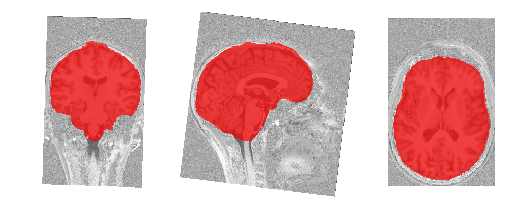

In [38]:
plotting.plot_roi(skullstripping_results['brain_mask'], t1w,
                  annotate=False, black_bg=False, draw_cross=False,
                  cmap='autumn')

In [40]:
mgdm_results = nighres.brain.mgdm_segmentation(
                                                contrast_image1=skullstripping_results['t1w_masked'],
                                                contrast_type1="Mp2rage7T",
                                                contrast_image2=skullstripping_results['t1map_masked'],
                                                contrast_type2="T1map7T",
                                                save_data=True, file_name='sub-pilot001_ses-001_acq-lores',
                                                output_dir=output_dir)


MGDM Segmentation

Outputs will be saved to /home/remi/gin/V5_high-res/pilot_1/derivatives/nighres/

Saving /home/remi/gin/V5_high-res/pilot_1/derivatives/nighres/sub-pilot001_ses-001_acq-lores_mgdm-seg.nii.gz

Saving /home/remi/gin/V5_high-res/pilot_1/derivatives/nighres/sub-pilot001_ses-001_acq-lores_mgdm-dist.nii.gz

Saving /home/remi/gin/V5_high-res/pilot_1/derivatives/nighres/sub-pilot001_ses-001_acq-lores_mgdm-lbls.nii.gz

Saving /home/remi/gin/V5_high-res/pilot_1/derivatives/nighres/sub-pilot001_ses-001_acq-lores_mgdm-mems.nii.gz


In [37]:
plotting.plot_img(mgdm_results['segmentation'],
                  vmin=1, vmax=50, cmap='cubehelix', colorbar=True,
                  annotate=False,  draw_cross=False)



ValueError: File not found: '/home/remi/gin/V5_high-res/pilot_1/derivatives/nighres/sub-pilot001_mgdm-seg.nii.gz'